# Pymaceuticals Inc.
---

### Analysis

- Write at least three observations or inferences that can be made from the data.
 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata,study_results, how="right", on=["Mouse ID"])

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# number of unique mice IDs
mouse_count = len(mouse_data["Mouse ID"].unique())
mouse_count

249

In [3]:
# find any mice IDs that show duplicate Timepoints. 
ID_duplicate = mouse_data[mouse_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
ID_duplicate["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: complete duplicate mouse ID data
ID_g989_data = mouse_data.loc[mouse_data["Mouse ID"]=="g989", :]
ID_g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Cleaned DataFrame - duplicate mouse ID data removed from df.
mouse_data_cln = mouse_data[mouse_data["Mouse ID"]!="g989"]
mouse_data_cln.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# number of unique mice IDs in clean DataFrame.
mouse_count_cln = len(mouse_data_cln["Mouse ID"].unique())
mouse_count_cln

248

## Summary Statistics

In [7]:
# Statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_summary=mouse_data_cln.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

# calc variance of the tumor volume
variance=mouse_data_cln.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_summary["Tumor Volume Variance"]=variance

# calc SEM of the tumor volume. 
sem=mouse_data_cln.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_summary["Tumor Volume Std. Err."]=sem

#rename columns to better represent data 
tumor_summary=tumor_summary.rename(columns={"mean":"Mean Tumor Volume","50%":"Median Tumor Volume","std":"Tumor Volume Std. Dev."})

#update coloumn order
tumor_summary[["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.","Tumor Volume Std. Err."]]


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method,produce the same summary statistics in a single line.

tumor_summary=mouse_data_cln.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

tumor_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

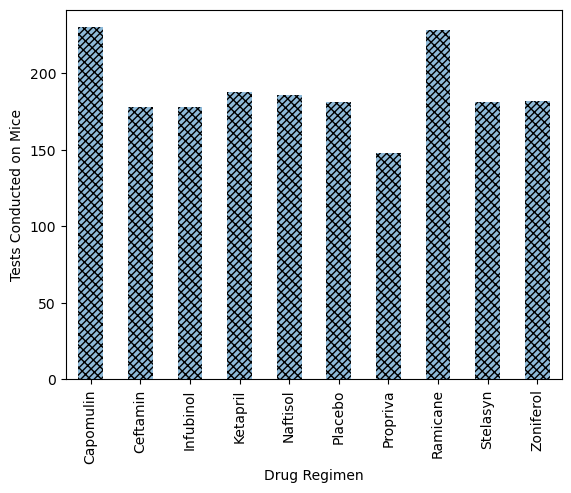

In [9]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Define data to use for chart
drug_regimen1=mouse_data_cln.groupby("Drug Regimen")[["Mouse ID"]].count()

#Sect x axis
x_axis=drug_regimen1

drug_regimen1.plot(kind="bar",legend=False,alpha=0.5,hatch=("\\\\\/////"))
plt.ylabel("Tests Conducted on Mice")

plt.show()


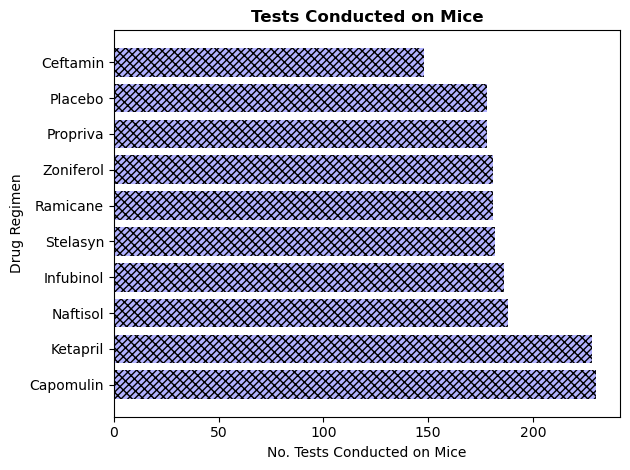

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Define X axis data
x_axis=mouse_data_cln["Drug Regimen"].unique()

# Define Y axis data
y_axis=mouse_data_cln["Drug Regimen"].value_counts()


# Set the chart type, x axis, y axis, Bar: alignment, colour, transparancy and pattern 
plt.barh(x_axis, y_axis, align="center", color="b", alpha=0.3, hatch=("\\\\\/////"))
# Set title and lables
plt.title("Tests Conducted on Mice",fontweight="bold")
plt.ylabel("Drug Regimen")
plt.xlabel("No. Tests Conducted on Mice")
plt.tight_layout()


In [11]:
#Find the sex values for pie plots showing the distribution of female versus male mice
pie_data=mouse_data_cln.groupby("Sex")["Mouse ID"].nunique()

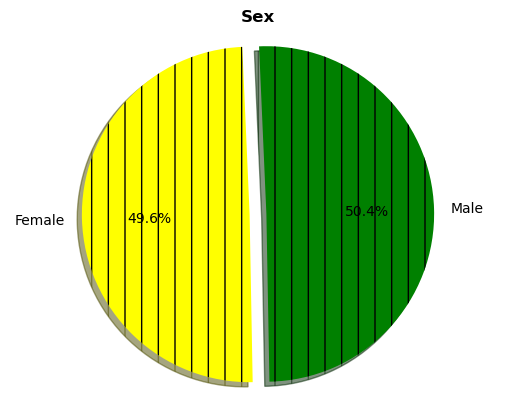

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data.plot(kind="pie",colors=("yellow","green"),autopct="%1.1f%%",hatch="|",startangle=92.5,explode=(0,.1),shadow=True)
plt.title("Sex",fontweight="bold")
plt.axis("equal")
plt.ylabel("")
plt.show()

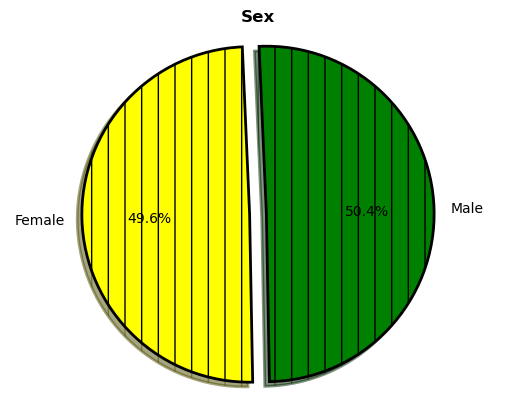

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]
count=[123,125]

colours=["yellow","green"]
explode=[0, 0.1]
wedgeprops = {"edgecolor": "black", "linewidth": 2, "hatch": "|"}

plt.title("Sex",fontweight="bold")
plt.pie(count,labels=labels,colors=colours,explode=explode,wedgeprops=wedgeprops,autopct="%1.1f%%",startangle=92.5,shadow=True)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#-----------

#Last (greatest) timepoint for each mouse
#Sort df by "Timepoint" in descending order
tumor_vol_sort=mouse_data_cln.sort_values(by=["Timepoint"], ascending=False)

#Keep first row of each "Mouse ID" (last timepoint)
final_tumor_vol=tumor_vol_sort.drop_duplicates(subset=["Mouse ID"])

#Reset index of dataframe
final_tumor_vol=final_tumor_vol.reset_index()

final_tumor_vol=final_tumor_vol.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
final_tumor_vol=final_tumor_vol[["Mouse ID","Final Tumor Volume (mm3)"]]

# Merge df with original cleaned DataFrame to include the tumor volume at the last timepoint in the df
tumor_data_complete=pd.merge(mouse_data_cln,final_tumor_vol, how="right", on=["Mouse ID"])


#group data by Drug Regimen: Capomulin, Ramicane, Infubinol, and Ceftamin
top_4_drugs=tumor_data_complete[tumor_data_complete["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
top_4_drugs=top_4_drugs[["Drug Regimen","Mouse ID","Final Tumor Volume (mm3)"]].drop_duplicates()
top_4_tumor_vol=top_4_drugs.groupby(["Drug Regimen"]).value_counts()
top_4_tumor_vol

Drug Regimen  Mouse ID  Final Tumor Volume (mm3)
Capomulin     b128      38.982878                   1
              b742      38.939633                   1
              y793      31.896238                   1
              w914      36.041047                   1
              w150      39.952347                   1
                                                   ..
Ramicane      d251      37.311236                   1
              c758      33.397653                   1
              c458      38.342008                   1
              a644      32.978522                   1
              z578      30.638696                   1
Length: 100, dtype: int64

In [15]:
#Treatment list for "for" loop (and later for plot labels)
treatment=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Empty list - fill with tumor vol data (for plotting)
tumor_vol_ca = []
tumor_vol_ra = []
tumor_vol_in = []
tumor_vol_ce = []

# Loop through rows in the top_4_drugs dataframe
for index, row in top_4_drugs.iterrows():
    treatment = row["Drug Regimen"]
    tumor_vol = row["Final Tumor Volume (mm3)"]
    
    if treatment == "Capomulin":
        tumor_vol_ca.append(tumor_vol)
        tumor_vol_ca.sort()

    elif treatment == "Ramicane":
        tumor_vol_ra.append(tumor_vol)
        tumor_vol_ra.sort()

    elif treatment == "Infubinol":
        tumor_vol_in.append(tumor_vol)
        tumor_vol_in.sort()

    elif treatment == "Ceftamin":
        tumor_vol_ce.append(tumor_vol)
        tumor_vol_ce.sort()    

In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.  

#Capomulin 
#first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1ca=np.percentile(tumor_vol_ca, 25)
Q3ca=np.percentile(tumor_vol_ca, 75)
IQRca=Q3ca-Q1ca
#lower and upper bounds and potential outliers
lower_bound_ca=Q1ca-(1.5*IQRca)
upper_bound_ca=Q3ca+(1.5*IQRca)
#potential outliers
outliers_ca=[x for x in tumor_vol_ca if x < lower_bound_ca or x > upper_bound_ca]


#Ramicane 
#first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1ra=np.percentile(tumor_vol_ra, 25)
Q3ra=np.percentile(tumor_vol_ra, 75)
IQRra=Q3ra-Q1ra
#lower and upper bounds and potential outliers
lower_bound_ra=Q1ra-(1.5*IQRra)
upper_bound_ra=Q3ra+(1.5*IQRra)
#potential outliers
outliers_ra=[x for x in tumor_vol_ra if x < lower_bound_ra or x > upper_bound_ra]


#Infubinol 
#first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1in=np.percentile(tumor_vol_in, 25)
Q3in=np.percentile(tumor_vol_in, 75)
IQRin=Q3in-Q1in
#lower and upper bounds and potential outliers
lower_bound_in=Q1in-(1.5*IQRin)
upper_bound_in=Q3in+(1.5*IQRin)
#potential outliers
outliers_in=[x for x in tumor_vol_in if x < lower_bound_in or x > upper_bound_in]


#Ceftamin 
#first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1ce=np.percentile(tumor_vol_ce, 25)
Q3ce=np.percentile(tumor_vol_ce, 75)
IQRce=Q3ce-Q1ce
#lower and upper bounds and potential outliers
lower_bound_ce=Q1ce-(1.5*IQRce)
upper_bound_ce=Q3ce+(1.5*IQRce)
outliers_ce=[x for x in tumor_vol_ce if x < lower_bound_ce or x > upper_bound_ce]


print("Capomulin Potential outliers: {}".format(outliers_ca))
print("Ramicane Potential outliers: {}".format(outliers_ra))
print("Infubinol Potential outliers: {}".format(outliers_in))
print("Ceftamin Potential outliers: {}".format(outliers_ce))

Capomulin Potential outliers: []
Ramicane Potential outliers: []
Infubinol Potential outliers: [36.3213458]
Ceftamin Potential outliers: []


C:\Users\rache\AppData\Local\Temp\ipykernel_38612\2642842627.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])


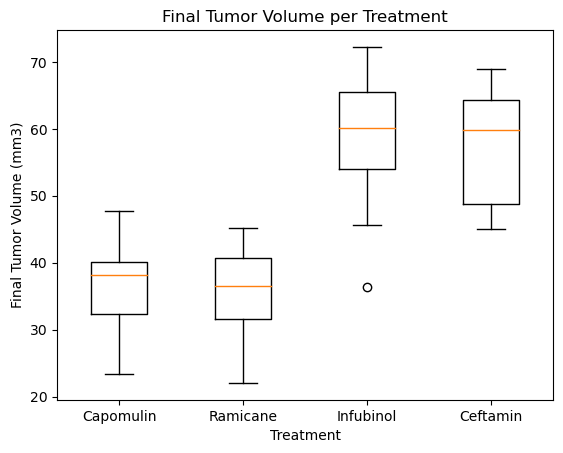

In [17]:
# box plot showing distrubution of tumor volume for each treatment group.
top4_treatments=[tumor_vol_ca,tumor_vol_ra,tumor_vol_in,tumor_vol_ce]

fig1, ax = plt.subplots()
ax.set_title("Final Tumor Volume per Treatment")
ax.set_xlabel("Treatment")
ax.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(top4_treatments)

plt.show()


## Line and Scatter Plots

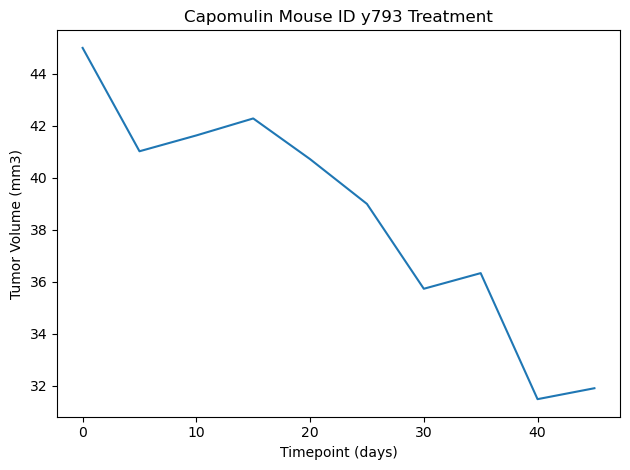

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Capomulin Mouse ID y793
IDy793=tumor_data_complete.loc[tumor_data_complete["Mouse ID"]=="y793",:]

#Define x and y axis 
x=IDy793["Timepoint"]
y=IDy793["Tumor Volume (mm3)"]
plt.plot(x,y)

# Set title and lables
plt.title("Capomulin Mouse ID y793 Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.tight_layout()

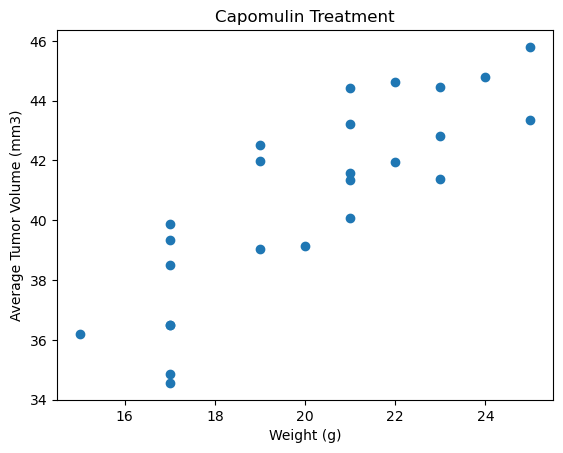

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin=tumor_data_complete.loc[tumor_data_complete["Drug Regimen"]=="Capomulin",:]
capomulin=capomulin[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]].groupby("Mouse ID").mean()

#Define x and y axis 
x_ax=capomulin["Weight (g)"]
y_ax=capomulin["Tumor Volume (mm3)"]
plt.scatter(x_ax,y_ax)

# Set title and lables
plt.title("Capomulin Treatment")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight acid and average tumor volume for the Capomulin regimen is 0.84


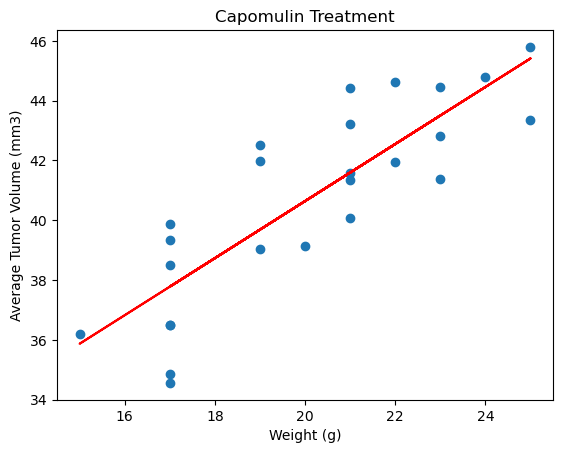

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight acid and average tumor volume for the Capomulin regimen is {round(st.pearsonr(x_ax,y_ax)[0],2)}")
#Define x and y axis 
x_ax=capomulin["Weight (g)"]
y_ax=capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_ax, y_ax)
regress_values = x_ax * slope + intercept
plt.scatter(x_ax,y_ax)
plt.plot(x_ax,regress_values,"r-")
# Set title and lables
plt.title("Capomulin Treatment")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

